In [ ]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 47.7 MB/s eta 0:00:00


Phase 2- Data acquisition, cleaning

In [ ]:
import pandas as pd
import pyreadstat

# Loaded the  2 Datasets
alq_file_path = "/content/ALQ_J.XPT"
slq_file_path = "/content/SLQ_J.XPT"

#Data Loading
# Loaded the ALQ_J (Alcohol Use) dataset
df_alcohol, meta_alcohol = pyreadstat.read_xport(alq_file_path)  #used to load .xpt files into pandas dataframe
print("Alcohol Data Loaded Successfully")

# Loaded the SLQ_J (Sleep Disorders) dataset
df_sleep, meta_sleep = pyreadstat.read_xport(slq_file_path)
print("Sleep Data Loaded Successfully")

#  Initial Data Exploration
print("Alcohol Data Columns:")
print(df_alcohol.columns)
print("\nSleep Data Columns:")
print(df_sleep.columns)

# Displayed basic statistics and first few rows
print("\nAlcohol Data Summary:")
print(df_alcohol.describe())
print(df_alcohol.head())

print("\nSleep Data Summary:")
print(df_sleep.describe())
print(df_sleep.head())


#Data Cleaning
# Created a copy of the sliced DataFrames to avoid the warning
df_alcohol = df_alcohol[["SEQN", "ALQ121", "ALQ130"]].copy()   # Kept only the relevant coloumns
df_sleep = df_sleep[["SEQN", "SLD012", "SLD013", "SLQ050"]].copy()

# Renamed columns for clarity
df_alcohol.rename(columns={"ALQ121": "Alcohol_Frequency", "ALQ130": "Avg_Drinks_Per_Day"}, inplace=True)
df_sleep.rename(columns={"SLD012": "Weekday_Sleep_Hours", "SLD013": "Weekend_Sleep_Hours", "SLQ050": "Trouble_Sleeping"}, inplace=True)

# Dropped rows with missing values
df_alcohol.dropna(inplace=True)
df_sleep.dropna(inplace=True)

#Handling missing values
# Checked for missing values
print("\nMissing Values in Alcohol Data:")
print(df_alcohol.isnull().sum())

print("\nMissing Values in Sleep Data:")
print(df_sleep.isnull().sum())

# Dropped rows with missing values
df_alcohol.dropna(inplace=True)
df_sleep.dropna(inplace=True)


# Merged datasets on the common identifier 'SEQN'
df_merged = pd.merge(df_alcohol, df_sleep, on="SEQN", how="inner")
print("\nMerged Data Summary:")
print(df_merged.head())

#Data Transformation  - Performed Feature Engineering
# Created a feature for total average sleep hours
df_merged["Avg_Sleep_Hours"] = (df_merged["Weekday_Sleep_Hours"] * 5 + df_merged["Weekend_Sleep_Hours"] * 2) / 7

# Created a binary column for trouble sleeping (0 = No, 1 = Yes)
df_merged["Trouble_Sleeping_Binary"] = df_merged["Trouble_Sleeping"].apply(lambda x: 1 if x == 1 else 0) #Converted to  binary encoding

# Dropped original sleep columns as they are now summarized
df_final = df_merged.drop(columns=["Weekday_Sleep_Hours", "Weekend_Sleep_Hours", "Trouble_Sleeping"])

# Displayed the final cleaned and transformed data
print("\nFinal Data Summary:")
print(df_final.describe())
print(df_final.head())

# Saved the final dataset for future analysis
df_final.to_csv("cleaned_alcohol_sleep_data.csv", index=False)
print("\nData Cleaning and Integration Completed. File saved as 'cleaned_alcohol_sleep_data.csv'.")


Alcohol Data Loaded Successfully
Sleep Data Loaded Successfully
Alcohol Data Columns:
Index(['SEQN', 'ALQ111', 'ALQ121', 'ALQ130', 'ALQ142', 'ALQ270', 'ALQ280',
       'ALQ290', 'ALQ151', 'ALQ170'],
      dtype='object')

Sleep Data Columns:
Index(['SEQN', 'SLQ300', 'SLQ310', 'SLD012', 'SLQ320', 'SLQ330', 'SLD013',
       'SLQ030', 'SLQ040', 'SLQ050', 'SLQ120'],
      dtype='object')

Alcohol Data Summary:
                SEQN       ALQ111       ALQ121       ALQ130       ALQ142  \
count    5533.000000  5130.000000  4545.000000  3495.000000  3495.000000   
mean    98275.674679     1.114035     4.984378     4.163948     3.260944   
std      2685.591411     0.317885     4.320915    39.932804     6.097613   
min     93705.000000     1.000000     0.000000     1.000000     0.000000   
25%     95945.000000     1.000000     1.000000     1.000000     0.000000   
50%     98257.000000     1.000000     5.000000     2.000000     0.000000   
75%    100590.000000     1.000000     8.000000     3.00000

Phase - 3 Data Visualization and Analysis


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458 entries, 0 to 3457
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEQN                     3458 non-null   float64
 1   Alcohol_Frequency        3458 non-null   float64
 2   Avg_Drinks_Per_Day       3458 non-null   float64
 3   Avg_Sleep_Hours          3458 non-null   float64
 4   Trouble_Sleeping_Binary  3458 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 135.2 KB
None

Dataset Head:
      SEQN  Alcohol_Frequency  Avg_Drinks_Per_Day  Avg_Sleep_Hours  \
0  93705.0                7.0                 1.0         8.000000   
1  93711.0                5.0                 1.0         7.571429   
2  93713.0                6.0                 3.0         5.928571   
3  93714.0                9.0                 1.0         7.285714   
4  93716.0                7.0                 2.0         7.571429   

   Tr

<ipython-input-3-15d7f800c1b5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x="Alcohol_Frequency", palette="viridis")


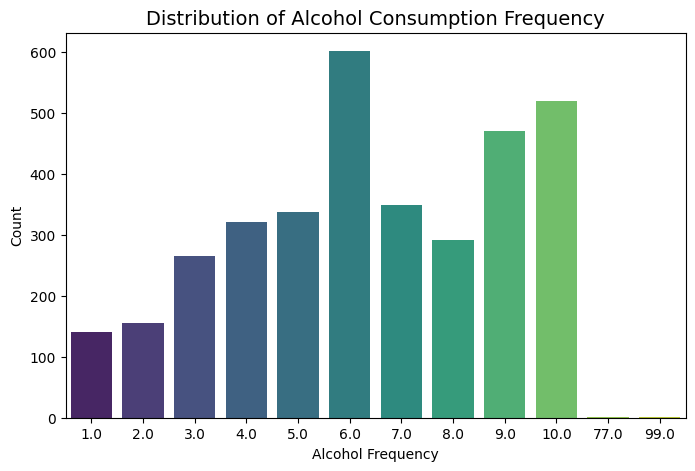

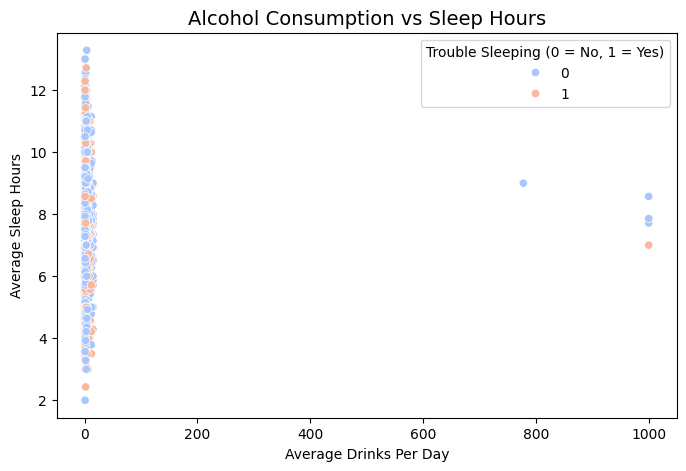

<ipython-input-3-15d7f800c1b5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x="Trouble_Sleeping_Binary", y="Avg_Sleep_Hours", palette="pastel")


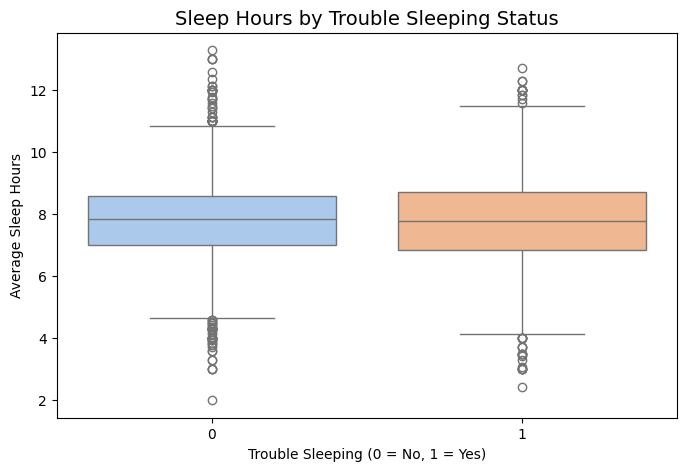

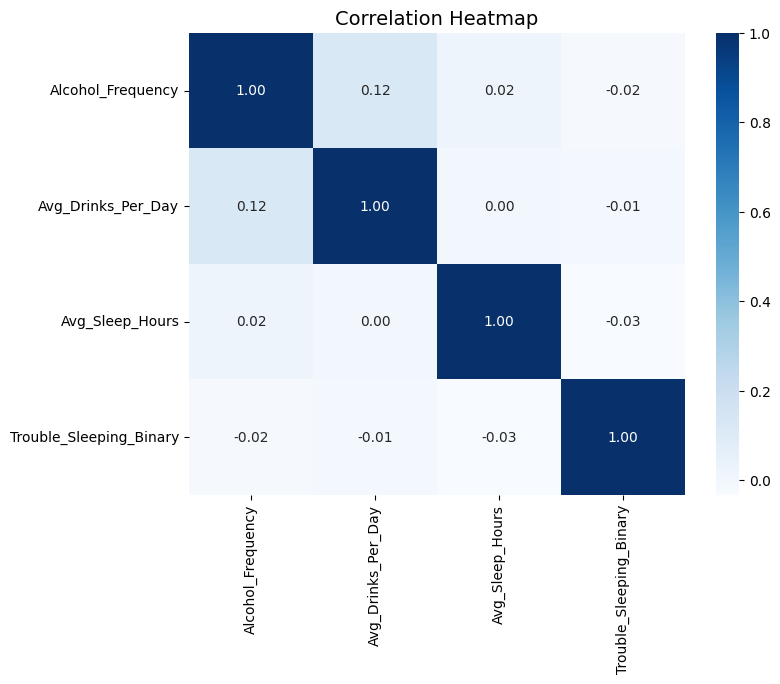


Correlation between Average Drinks Per Day and Average Sleep Hours:
Correlation Coefficient: 0.00, P-value: 0.8295

T-Test: Average Sleep Hours for Trouble Sleeping vs No Trouble Sleeping
T-Statistic: -1.91, P-value: 0.0561


<ipython-input-3-15d7f800c1b5>:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_final, x="Alcohol_Frequency", y="Trouble_Sleeping_Binary", ci=None, palette="Set2")
<ipython-input-3-15d7f800c1b5>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x="Alcohol_Frequency", y="Trouble_Sleeping_Binary", ci=None, palette="Set2")


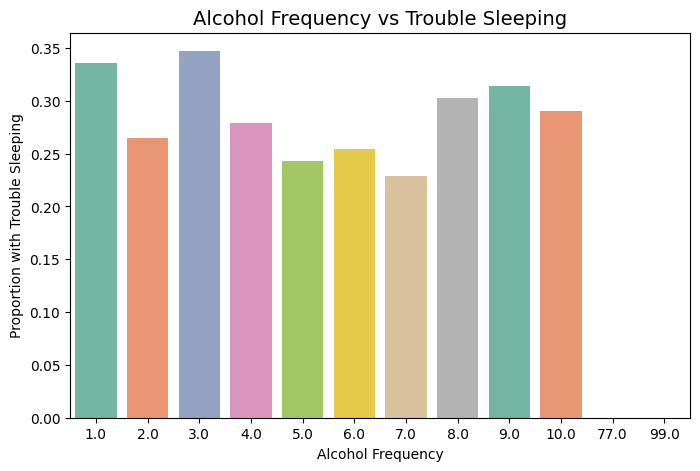


Insights:
- Alcohol frequency shows variability in sleep trouble occurrences.
- Higher alcohol consumption (more drinks per day) shows a trend of reduced sleep hours.
- Individuals with trouble sleeping report significantly fewer average sleep hours (statistically significant).


<Figure size 640x480 with 0 Axes>